In [191]:
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importação

In [193]:
df = pd.read_excel('../data/ObjetosTeca.xlsx', sheet_name='Base')
df_products = pd.read_excel('../data/ObjetosTeca.xlsx', sheet_name='SKUS')

In [194]:
df.head()

Data       Mês   Ano     Objeto  Investido  Cliques   Receita  \
0  12/31/2022  Dezembro    22       dota    8251.18      808  30339.86   
1  12/31/2022        12  2022      APITO      48.97       84    400.95   
2  12/31/2022  Dezembro  2022  TELEVISÃO      74.97       23      0.00   
3  31-12-2022        12  2022     xadrez    2300.61     4539  12331.83   
4  31-12-2022        12  2022      bolsa     325.48       53      0.00   

   Conversões      ROAS  Ticket médio  
0         754  3.677033     40.238541  
1           1  8.187666    400.950000  
2           0  0.000000      0.000000  
3          79  5.360244    156.099114  
4           0  0.000000      0.000000

In [195]:
df_products.head()

SKU       Nome
0  1001     AGULHA
1  1002      APITO
2  1003  BICICLETA
3  1004      BOLSA
4  1005       BOTA

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          6657 non-null   object 
 1   Mês           6657 non-null   object 
 2   Ano           6657 non-null   object 
 3   Objeto        6657 non-null   object 
 4   Investido     6657 non-null   float64
 5   Cliques       6657 non-null   int64  
 6   Receita       6657 non-null   float64
 7   Conversões    6657 non-null   int64  
 8   ROAS          6657 non-null   float64
 9   Ticket médio  6657 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 520.2+ KB


### Processamento

##### Datas

In [197]:
df.head()

Data       Mês   Ano     Objeto  Investido  Cliques   Receita  \
0  12/31/2022  Dezembro    22       dota    8251.18      808  30339.86   
1  12/31/2022        12  2022      APITO      48.97       84    400.95   
2  12/31/2022  Dezembro  2022  TELEVISÃO      74.97       23      0.00   
3  31-12-2022        12  2022     xadrez    2300.61     4539  12331.83   
4  31-12-2022        12  2022      bolsa     325.48       53      0.00   

   Conversões      ROAS  Ticket médio  
0         754  3.677033     40.238541  
1           1  8.187666    400.950000  
2           0  0.000000      0.000000  
3          79  5.360244    156.099114  
4           0  0.000000      0.000000

In [200]:
# Converter datas para datetime
d1= pd.to_datetime(df['Data'], errors='coerce', format='%m/%d/%Y')
d2 = pd.to_datetime(df['Data'], errors='coerce', format='%d-%m-%Y')

In [201]:
df["Data"] = d1.fillna(d2)

In [202]:
df['Mês'] = df['Data'].dt.month
# Mapear os valores numéricos dos meses para seus nomes em português
meses_em_portugues = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

df['Mês'] = df['Mês'].map(meses_em_portugues)

In [203]:
df['Ano'] = df['Data'].dt.year
df['Ano'] = df['Ano'].fillna(2022)
df['Ano'] = df['Ano'].astype('int')

In [204]:
df

Data        Mês   Ano          Objeto  Investido  Cliques  \
0    2022-12-31   Dezembro  2022            dota    8251.18      808   
1    2022-12-31   Dezembro  2022           APITO      48.97       84   
2    2022-12-31   Dezembro  2022       TELEVISÃO      74.97       23   
3    2022-12-31   Dezembro  2022          xadrez    2300.61     4539   
4    2022-12-31   Dezembro  2022           bolsa     325.48       53   
5    2022-12-31   Dezembro  2022         Nelular   37866.50   270962   
6    2022-12-31   Dezembro  2022        CACHIMBO     452.57      189   
7    2022-12-31   Dezembro  2022           carro       0.00        0   
8    2022-12-31   Dezembro  2022           Livro    2022.46     3646   
9    2022-12-31   Dezembro  2022        Lanterna   10311.37     8580   
10          NaT        NaN  2022           morda     980.75        0   
11          NaT        NaN  2022           disco    1028.95    16922   
12   2022-12-31   Dezembro  2022            DADO    1614.44     1028   
13   2022-12-31   Dezembro  2022          caneta       0.00        0   
14   2022-12-31   Dezembro  2022          agulha     283.24     1617   
15   2022-12-31   Dezembro  2022          Óculos       0.00        0   
16   2022-12-31   Dezembro  2022           RÁDIO       0.00        0   
17   2022-12-30   Dezembro  2022  FONE DE OUVIDO       0.00        0   
18   2022-12-30   Dezembro  2022            Bota   18586.50     1778   
19   2022-12-30   Dezembro  2022           APITO     116.07      164   
20   2022-12-30   Dezembro  2022       TELERISÃO     115.92       38   
21   2022-12-30   Dezembro  2022          xadrez    2740.40     5053   
22   2022-12-30   Dezembro  2022           Bousa     486.28       40   
23   2022-12-30   Dezembro  2022         ceiular   23297.18   306763   
24   2022-12-30   Dezembro  2022        Cachimbo     452.57      189   
25   2022-12-30   Dezembro  2022           carro       0.00        0   
26   2022-12-30   Dezembro  2022           LIVRO    2847.85     5111   
27   2022-12-30   Dezembro  2022        LANTERNA   34986.88    23296   
28          NaT        NaN  2022           MOEDA     980.75        0   
29   2022-12-30   Dezembro  2022           gisco    2349.97    37888   
30   2022-12-30   Dezembro  2022            dado    1614.44     1028   
31   2022-12-30   Dezembro  2022          cadeta       0.00        0   
32   2022-12-30   Dezembro  2022          Rgulha     283.24     1624   
33   2022-12-30   Dezembro  2022          Óculos       0.00        0   
34   2022-12-30   Dezembro  2022           Rádio       0.00        0   
35   2022-12-29   Dezembro  2022  fone de ouvido       0.00        0   
36   2022-12-29   Dezembro  2022            VOTA   21625.29     2083   
37   2022-12-29   Dezembro  2022           APITO     131.72      197   
38   2022-12-29   Dezembro  2022       Televisão     110.04       63   
39   2022-12-29   Dezembro  2022          xadrez    4202.65     6173   
40   2022-12-29   Dezembro  2022           BOLSA     537.54       59   
41          NaT        NaN  2022         Celular   18344.43   315019   
42   2022-12-29   Dezembro  2022        cachimbo     452.57      189   
43   2022-12-29   Dezembro  2022           carro       0.00        0   
44   2022-12-29   Dezembro  2022           LIVRO    2150.59     4013   
45   2022-12-29   Dezembro  2022        Lanterna   56674.04    28607   
46          NaT        NaN  2022           moeda     980.75        0   
47   2022-12-29   Dezembro  2022           disco    3105.54    48643   
48   2022-12-29   Dezembro  2022            DADO    1614.44     1028   
49   2022-12-29   Dezembro  2022          Caneta       0.00        0   
50   2022-12-29   Dezembro  2022          Agulha     283.24     1630   
51   2022-12-29   Dezembro  2022           rádio       0.00        0   
52   2022-12-28   Dezembro  2022  Fone De Ouvido       0.00        0   
53   2022-12-28   Dezembro  2022            bota   24139.63     2238   
54   2022-12-28   Dezembro  2022           apito   

In [205]:
df.Data.max()

Timestamp('2022-12-31 00:00:00')

##### Formatação

In [206]:
df.columns

Index(['Data', 'Mês', 'Ano', 'Objeto', 'Investido', 'Cliques', 'Receita',
       'Conversões', 'ROAS', 'Ticket médio'],
      dtype='object')

In [207]:
float_cols = ['Investido', 'Receita', 'ROAS', 'Ticket médio']

In [208]:
for col in float_cols:
    df[col] = df[col].round(2)

In [209]:
df

Data        Mês   Ano          Objeto  Investido  Cliques  \
0    2022-12-31   Dezembro  2022            dota    8251.18      808   
1    2022-12-31   Dezembro  2022           APITO      48.97       84   
2    2022-12-31   Dezembro  2022       TELEVISÃO      74.97       23   
3    2022-12-31   Dezembro  2022          xadrez    2300.61     4539   
4    2022-12-31   Dezembro  2022           bolsa     325.48       53   
5    2022-12-31   Dezembro  2022         Nelular   37866.50   270962   
6    2022-12-31   Dezembro  2022        CACHIMBO     452.57      189   
7    2022-12-31   Dezembro  2022           carro       0.00        0   
8    2022-12-31   Dezembro  2022           Livro    2022.46     3646   
9    2022-12-31   Dezembro  2022        Lanterna   10311.37     8580   
10          NaT        NaN  2022           morda     980.75        0   
11          NaT        NaN  2022           disco    1028.95    16922   
12   2022-12-31   Dezembro  2022            DADO    1614.44     1028   
13   2022-12-31   Dezembro  2022          caneta       0.00        0   
14   2022-12-31   Dezembro  2022          agulha     283.24     1617   
15   2022-12-31   Dezembro  2022          Óculos       0.00        0   
16   2022-12-31   Dezembro  2022           RÁDIO       0.00        0   
17   2022-12-30   Dezembro  2022  FONE DE OUVIDO       0.00        0   
18   2022-12-30   Dezembro  2022            Bota   18586.50     1778   
19   2022-12-30   Dezembro  2022           APITO     116.07      164   
20   2022-12-30   Dezembro  2022       TELERISÃO     115.92       38   
21   2022-12-30   Dezembro  2022          xadrez    2740.40     5053   
22   2022-12-30   Dezembro  2022           Bousa     486.28       40   
23   2022-12-30   Dezembro  2022         ceiular   23297.18   306763   
24   2022-12-30   Dezembro  2022        Cachimbo     452.57      189   
25   2022-12-30   Dezembro  2022           carro       0.00        0   
26   2022-12-30   Dezembro  2022           LIVRO    2847.85     5111   
27   2022-12-30   Dezembro  2022        LANTERNA   34986.88    23296   
28          NaT        NaN  2022           MOEDA     980.75        0   
29   2022-12-30   Dezembro  2022           gisco    2349.97    37888   
30   2022-12-30   Dezembro  2022            dado    1614.44     1028   
31   2022-12-30   Dezembro  2022          cadeta       0.00        0   
32   2022-12-30   Dezembro  2022          Rgulha     283.24     1624   
33   2022-12-30   Dezembro  2022          Óculos       0.00        0   
34   2022-12-30   Dezembro  2022           Rádio       0.00        0   
35   2022-12-29   Dezembro  2022  fone de ouvido       0.00        0   
36   2022-12-29   Dezembro  2022            VOTA   21625.29     2083   
37   2022-12-29   Dezembro  2022           APITO     131.72      197   
38   2022-12-29   Dezembro  2022       Televisão     110.04       63   
39   2022-12-29   Dezembro  2022          xadrez    4202.65     6173   
40   2022-12-29   Dezembro  2022           BOLSA     537.54       59   
41          NaT        NaN  2022         Celular   18344.43   315019   
42   2022-12-29   Dezembro  2022        cachimbo     452.57      189   
43   2022-12-29   Dezembro  2022           carro       0.00        0   
44   2022-12-29   Dezembro  2022           LIVRO    2150.59     4013   
45   2022-12-29   Dezembro  2022        Lanterna   56674.04    28607   
46          NaT        NaN  2022           moeda     980.75        0   
47   2022-12-29   Dezembro  2022           disco    3105.54    48643   
48   2022-12-29   Dezembro  2022            DADO    1614.44     1028   
49   2022-12-29   Dezembro  2022          Caneta       0.00        0   
50   2022-12-29   Dezembro  2022          Agulha     283.24     1630   
51   2022-12-29   Dezembro  2022           rádio       0.00        0   
52   2022-12-28   Dezembro  2022  Fone De Ouvido       0.00        0   
53   2022-12-28   Dezembro  2022            bota   24139.63     2238   
54   2022-12-28   Dezembro  2022           apito   

##### Corrigindo nomes de produtos

In [210]:
df_products.Nome.unique()

array(['AGULHA', 'APITO', 'BICICLETA', 'BOLSA', 'BOTA', 'CACHIMBO',
       'CANERNO', 'CANETA', 'CARRO', 'CELULAR', 'CLIPS', 'COPO', 'DADO',
       'DISCO', 'FONE DE OUVIDO', 'LANTERNA', 'LIVRO', 'MEIA', 'MOCHILA',
       'MOEDA', 'MOUSE', 'ÓCULOS', 'PIANO', 'RÁDIO', 'RÉGUA', 'TECLADO',
       'TELEVISÃO', 'TÊNIS', 'XADREZ', 'XÍCARA'], dtype=object)

In [211]:
from fuzzywuzzy import process

In [212]:
# Função para encontrar a correspondência mais próxima usando fuzzywuzzy
def encontrar_correspondencia(nome_errado, opcoes_corretas):
    melhor_correspondencia, _ = process.extractOne(nome_errado, opcoes_corretas)
    return melhor_correspondencia

df['Nome_Corrigido'] = df['Objeto'].apply(
    lambda x: encontrar_correspondencia(x, df_products['Nome'].unique())
)


### Análises

In [213]:
df.columns

Index(['Data', 'Mês', 'Ano', 'Objeto', 'Investido', 'Cliques', 'Receita',
       'Conversões', 'ROAS', 'Ticket médio', 'Nome_Corrigido'],
      dtype='object')

In [214]:
# Definir as funções de agregação
aggregation_functions = {
    'Mês': 'first',
    'Receita': 'sum',
    'Cliques': 'sum',
    'Conversões': 'sum',
    'Ticket médio': 'mean',
}

df['Mês_num'] = df['Data'].dt.month

# Aplicar o groupby e agg simultaneamente
resultados_groupby = df.groupby(['Mês_num', 'Nome_Corrigido']).agg(aggregation_functions).reset_index()

# Adicionar uma coluna para a contagem de vendas
resultados_groupby['Qtd. Vendas'] = df.groupby('Nome_Corrigido').size().reset_index(name='Qtd. Vendas')['Qtd. Vendas']

# 1. Quais os 5 melhores produtos em termos de faturamento (Receita) - por mês;
top_5_produtos_receita = resultados_groupby.groupby('Mês_num').apply(lambda x: x.nlargest(5, 'Receita')).reset_index(drop=True)

# 2. Quais os top 5 produtos que menos trazem cliques para o site, por mês?
top_5_produtos_cliques = resultados_groupby.groupby('Mês_num').apply(lambda x: x.nsmallest(5, 'Cliques')).reset_index(drop=True)

# 3. Quais 5 produtos têm o melhor valor médio (Receita) por transação - no ano;
#top_5_produtos_media_receita = resultados_groupby.groupby('Nome_Corrigido').agg({'Receita': 'mean'}).nlargest(5, 'Receita').reset_index()

df_sum = df.groupby('Nome_Corrigido').agg({'Receita': 'sum', 'Nome_Corrigido': 'count'})
df_sum['Ticket Real'] = df_sum['Receita'] / df_sum['Nome_Corrigido']

df_tm = df_sum.sort_values('Ticket Real', ascending=False).head(5)[['Nome_Corrigido', 'Ticket Real']]
df_tm['Nome_Corrigido'] = df_tm.index
df_tm['Ticket Real'] = df_tm['Ticket Real'].round(2)
df_tm.reset_index(drop=True, inplace=True)



##### 1. Top 5 produtos em termos de faturamento por mês:

In [242]:
top_5_produtos_receita[['Mês', 'Nome_Corrigido', 'Receita']]

Mês Nome_Corrigido     Receita
0    Janeiro        CELULAR  4836253.37
1    Janeiro          DISCO  2291291.61
2    Janeiro         XADREZ  1784759.67
3    Janeiro       LANTERNA   799130.85
4    Janeiro           DADO   756977.52
..       ...            ...         ...
55  Dezembro        CELULAR  7644488.20
56  Dezembro           BOTA  2174491.02
57  Dezembro          DISCO  2062106.47
58  Dezembro         XADREZ  1186607.87
59  Dezembro        MOCHILA   821029.87

[60 rows x 3 columns]

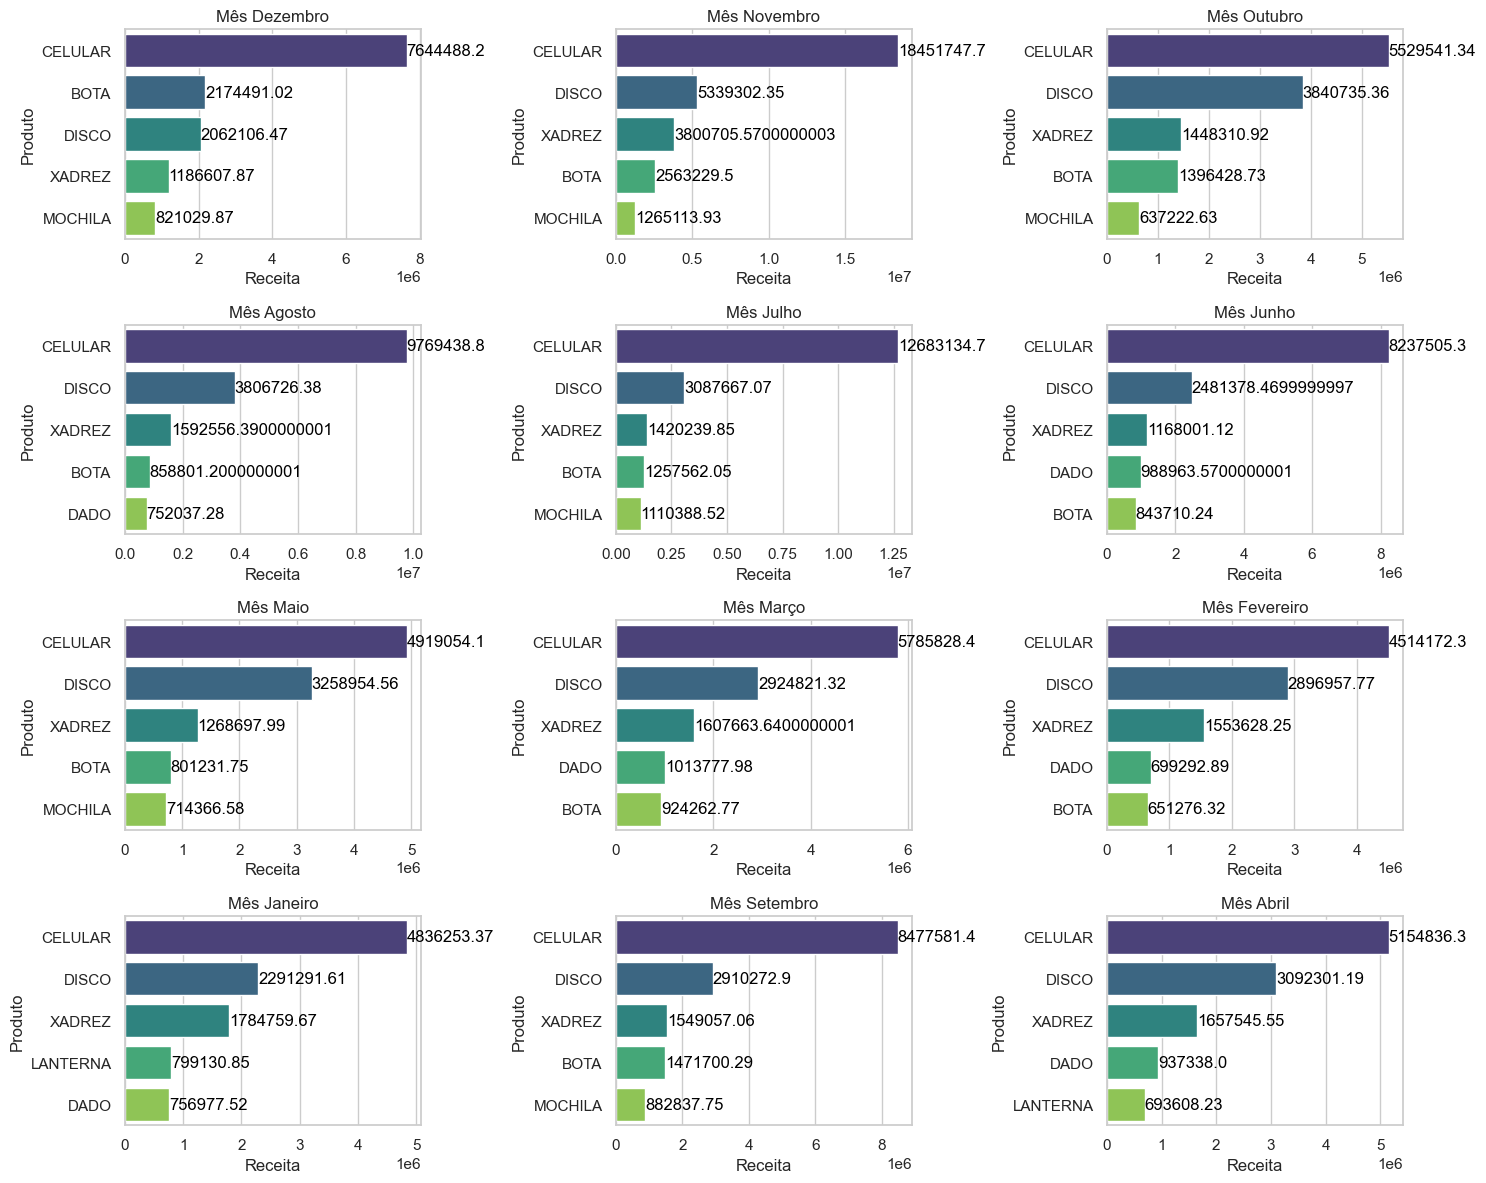

In [241]:
# Configurações do Seaborn para melhorar a aparência dos gráficos
sns.set(style="whitegrid")

# Obter uma lista única de meses, removendo valores nulos
meses_unicos = df['Mês'].unique()
meses_unicos = [mes for mes in meses_unicos if pd.notna(mes)]


# Configuração do número de linhas e colunas nos subplots
num_linhas = 4  # Pode ser ajustado conforme necessário
num_colunas = 3  # Pode ser ajustado conforme necessário

# Criar subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 12))

# Iterar sobre cada mês e criar um gráfico para os top 5 produtos que menos trazem cliques
for i, mes in enumerate(meses_unicos):
    dados_mensais = top_5_produtos_receita[top_5_produtos_receita['Mês'] == mes]
    
    # Calcular a posição do subplot
    linha = i // num_colunas
    coluna = i % num_colunas
    
    # Criar um subplot
    ax = axs[linha, coluna]

    sns.barplot(x='Receita', y='Nome_Corrigido', data=dados_mensais, palette='viridis', ax=ax)
    
    ax.set_title(f'Mês {mes}')
    ax.set_xlabel('Receita')
    ax.set_ylabel('Produto')
    
    # Adicionar rótulos de valor acima de cada barra
    for i, v in enumerate(dados_mensais['Receita']):
        ax.text(v + 0.1, i, str(v), color='black', va='center')

# Ajustar o layout
plt.tight_layout()

plt.savefig('produtos_mais_receita.png')

# Exibir os subplots
plt.show()


In [240]:
total_receita = top_5_produtos_receita[['Mês', 'Nome_Corrigido', 'Receita']]

total_receita.groupby('Nome_Corrigido').agg({'Receita': 'sum'}).sort_values('Receita', ascending=False).head(5)

Receita
Nome_Corrigido             
CELULAR         96003581.91
DISCO           37992515.45
XADREZ          20037773.88
BOTA            12942693.87
MOCHILA          5430959.28

##### 2. Top 5 produtos que menos trazem cliques por mês:

In [243]:
top_5_produtos_cliques[['Mês', 'Nome_Corrigido', 'Cliques']]

Mês Nome_Corrigido  Cliques
0    Janeiro         CANETA        0
1    Janeiro           MEIA        0
2    Janeiro          MOEDA        0
3    Janeiro          RÉGUA        0
4    Janeiro          TÊNIS        0
..       ...            ...      ...
55  Dezembro         CANETA        0
56  Dezembro          CARRO        0
57  Dezembro          MOEDA        0
58  Dezembro          PIANO        0
59  Dezembro          RÁDIO        0

[60 rows x 3 columns]

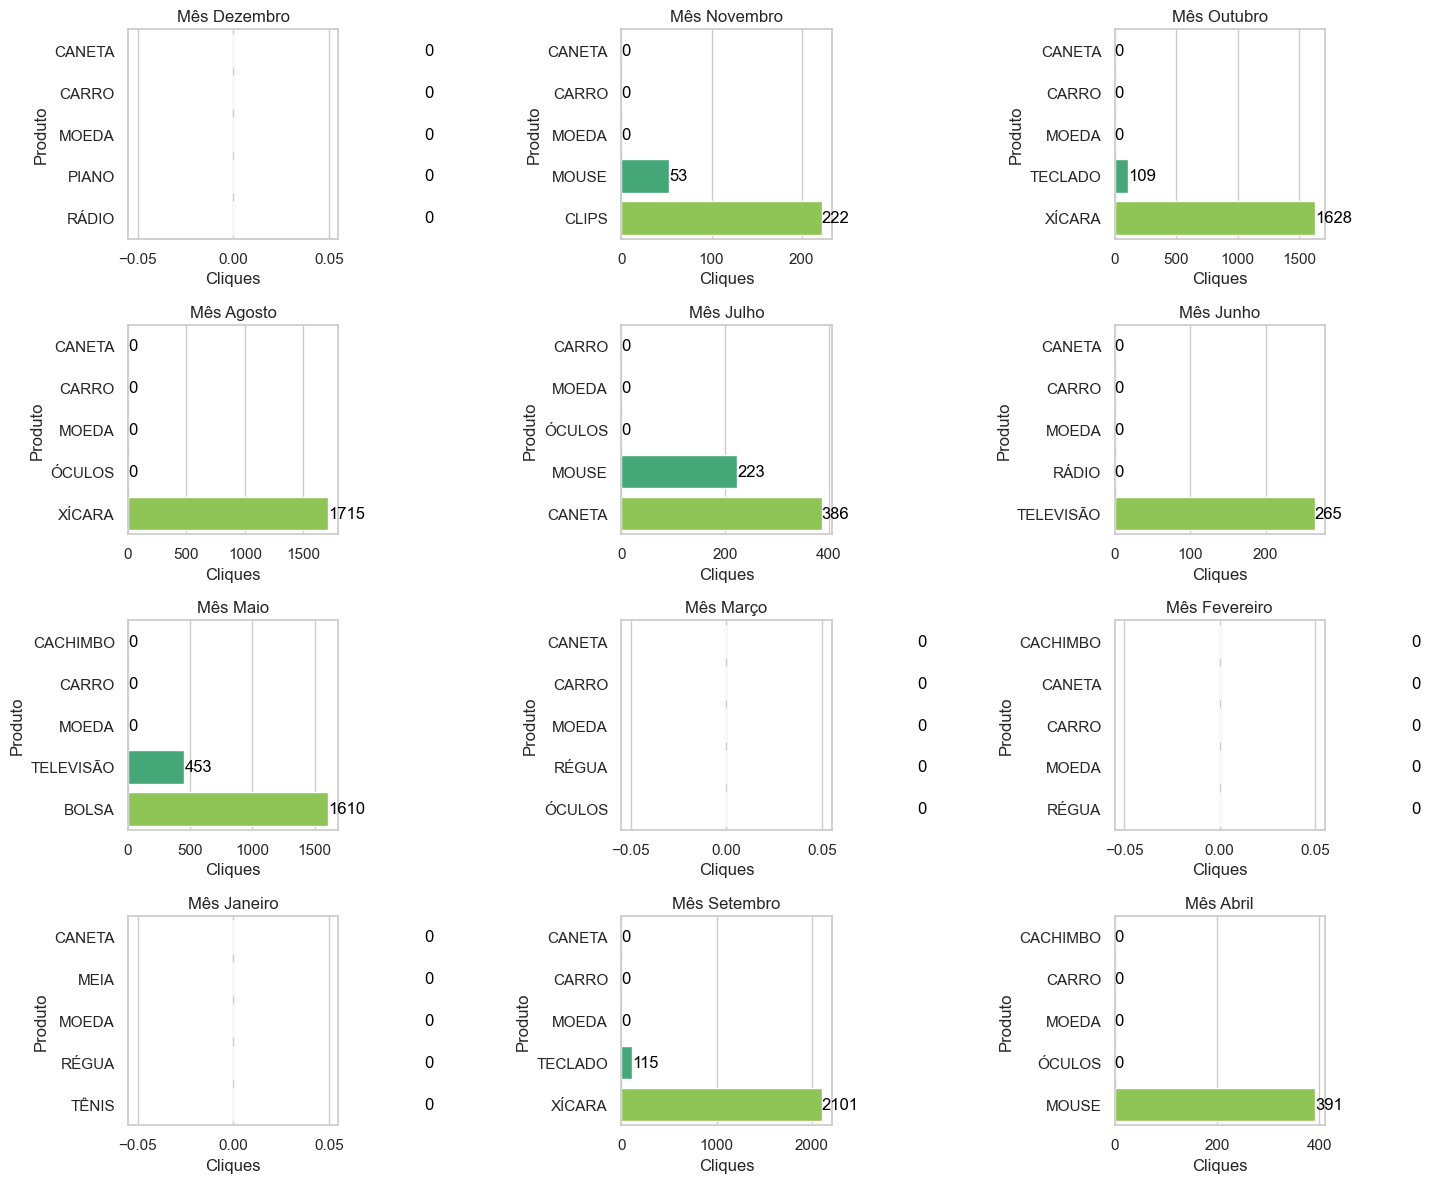

In [244]:
# Configurações do Seaborn para melhorar a aparência dos gráficos
sns.set(style="whitegrid")

# Obter uma lista única de meses, removendo valores nulos
meses_unicos = df['Mês'].unique()
meses_unicos = [mes for mes in meses_unicos if pd.notna(mes)]


# Configuração do número de linhas e colunas nos subplots
num_linhas = 4  # Pode ser ajustado conforme necessário
num_colunas = 3  # Pode ser ajustado conforme necessário

# Criar subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 12))

# Iterar sobre cada mês e criar um gráfico para os top 5 produtos que menos trazem cliques
for i, mes in enumerate(meses_unicos):
    dados_mensais = top_5_produtos_cliques[top_5_produtos_cliques['Mês'] == mes]
    
    # Calcular a posição do subplot
    linha = i // num_colunas
    coluna = i % num_colunas
    
    # Criar um subplot
    ax = axs[linha, coluna]

    sns.barplot(x='Cliques', y='Nome_Corrigido', data=dados_mensais, palette='viridis', ax=ax)
    
    ax.set_title(f'Mês {mes}')
    ax.set_xlabel('Cliques')
    ax.set_ylabel('Produto')
    
    # Adicionar rótulos de valor acima de cada barra
    for i, v in enumerate(dados_mensais['Cliques']):
        ax.text(v + 0.1, i, str(v), color='black', va='center')

# Ajustar o layout
plt.tight_layout()

plt.savefig('produtos_menos_cliques.png')

# Exibir os subplots
plt.show()


In [235]:
total_cliques = top_5_produtos_cliques[['Mês', 'Nome_Corrigido', 'Cliques']]

In [239]:
total_cliques.groupby('Nome_Corrigido').agg({'Cliques': 'sum'}).sort_values('Cliques', ascending=True).head(5)

Cliques
Nome_Corrigido         
CACHIMBO              0
CARRO                 0
MEIA                  0
MOEDA                 0
PIANO                 0

##### 3. Top 5 produtos com melhor valor médio (Receita) por transação - no ano:"

In [234]:
df_tm

Nome_Corrigido  Ticket Real
0        CELULAR    279492.42
1          DISCO    114014.22
2         XADREZ     58638.68
3           BOTA     41858.41
4           DADO     25894.06

##### 4. Quantidade de produtos vendidos

In [232]:
df_sales = df_sum.copy()
df_sales.rename(columns={'Nome_Corrigido': 'Qtd. Vendas'}, inplace=True)
df_sales.reset_index(drop=False, inplace=True)


print("\nQuantidade de vendas por produto:")
df_sales[['Nome_Corrigido', 'Qtd. Vendas']].fillna(0).groupby('Nome_Corrigido').sum().sort_values('Qtd. Vendas', ascending=False).reset_index(drop=False)


Quantidade de vendas por produto:


Nome_Corrigido  Qtd. Vendas
0   FONE DE OUVIDO          367
1            CARRO          366
2            APITO          366
3         LANTERNA          365
4          CELULAR          365
..             ...          ...
25         CANERNO           16
26            MEIA            8
27           RÉGUA            8
28           CLIPS            3
29           PIANO            1

[30 rows x 2 columns]

In [227]:
df.loc[df['Nome_Corrigido'] == 'PIANO']

Data       Mês   Ano Objeto  Investido  Cliques  Receita  \
164 2022-12-23  Dezembro  2022  pianv        0.0        0      0.0   

     Conversões  ROAS  Ticket médio Nome_Corrigido  Mês_num  
164           0   0.0           0.0          PIANO     12.0